In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [6]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
usecols = ['longitude', 'latitude', 'median_house_value']
home_data = df[usecols]
home_data

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0
...,...,...,...
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0


# Visualize the Data


<Axes: xlabel='longitude', ylabel='latitude'>

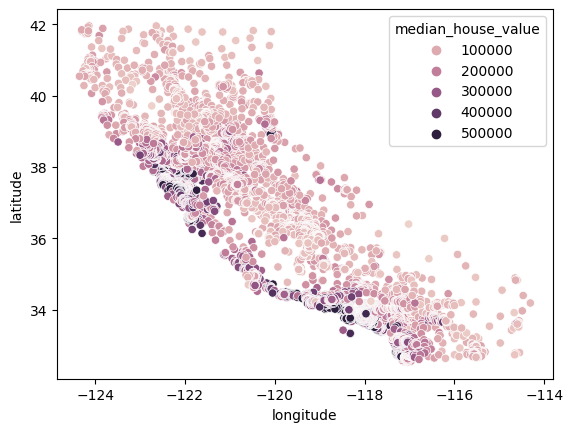

In [8]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

# Normalizing the Data


In [9]:
# We first set up training and test splits using train_test_split from sklearn. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

# Next, we normalize the training and test data using the preprocessing.normalize() method from sklearn. 
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# Fitting and Evaluating the Model


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

# visualize clusters

<Axes: xlabel='longitude', ylabel='latitude'>

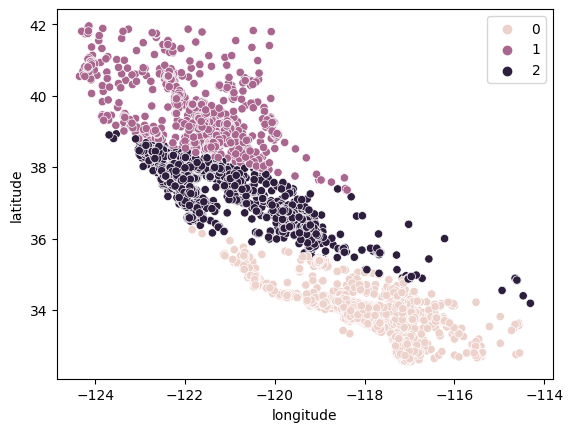

In [13]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California).

We can also look at the distribution of median house prices in these 3 groups using a boxplot. 

<Axes: ylabel='median_house_value'>

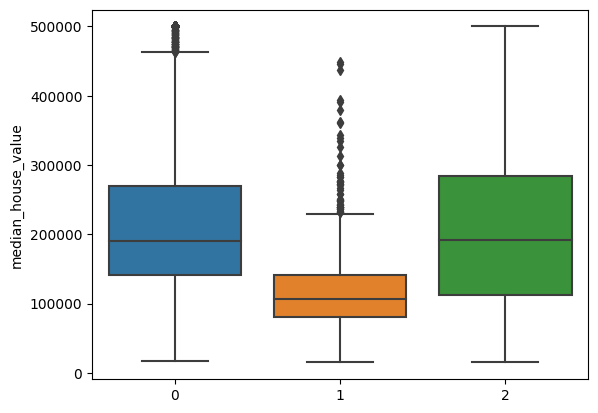

In [14]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

We clearly see that the Northern and Southern clusters have similar distributions of median house values (clusters 0 and 2) that are higher than the prices in the central cluster (cluster 1). 

We can evaluate performance of the clustering algorithm using a **Silhouette** score which is a part of sklearn.metrics where a lower score represents a better fit.

In [15]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703546

In [19]:
K = range(2, 8)
fits = []
scores = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score = silhouette_score(X_train_norm, model.labels_, metric='euclidean')
    scores.append(score)
    print(k, score)

2 0.7754128527515257
3 0.7499371920703546
4 0.6977084899900465
5 0.6404445378227861
6 0.6641273887010468
7 0.6411192392524833


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

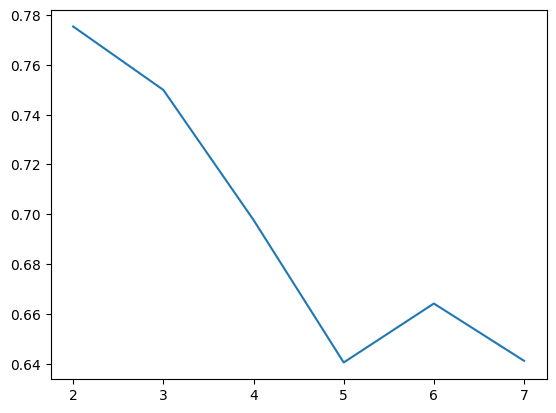

In [22]:
sns.lineplot(x = K, y = scores)

We typically choose the point where the improvements in performance start to flatten or get worse. We see k = 5 is probably the best we can do without overfitting. 

<Axes: xlabel='longitude', ylabel='latitude'>

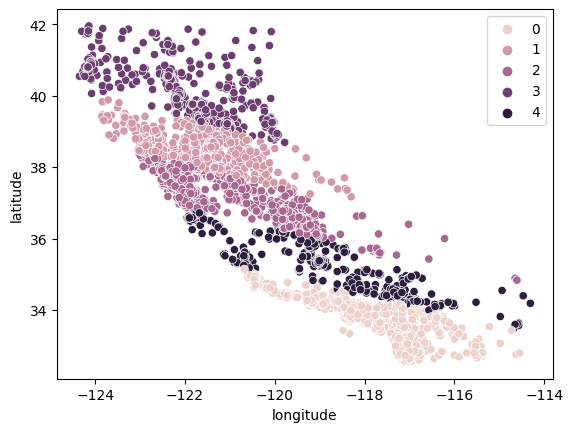

In [23]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

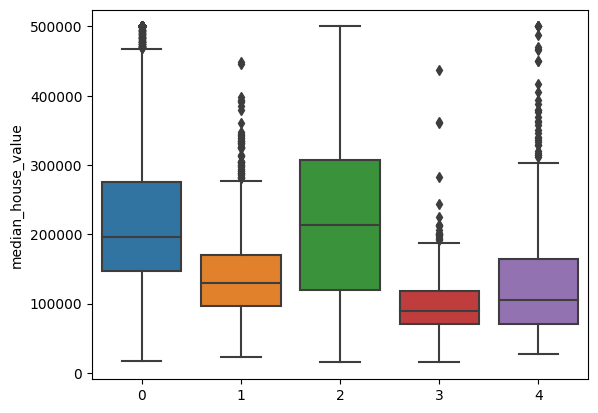

In [24]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])